In [5]:
pip install dash

In [6]:
import pandas as pd  # For data manipulation and analysis using DataFrames.
import numpy as np  # For numerical computations and array operations.
import seaborn as sns  # For creating statistical data visualizations.
import matplotlib.pyplot as plt  # For plotting graphs and visualizing data.
from sklearn.preprocessing import MinMaxScaler  # For normalizing features to a fixed range.
from tensorflow.keras.models import Sequential  # For building sequential neural network models.
from tensorflow.keras.layers import LSTM, Dense, Dropout  # For defining LSTM layers and regular dense/dropout layers in deep learning models.
from statsmodels.tsa.arima.model import ARIMA  # For building ARIMA time series forecasting models.
from sklearn.metrics import mean_absolute_error, mean_squared_error  # For evaluating model performance with error metrics.
from sklearn.model_selection import train_test_split  # For splitting datasets into training and testing sets.
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing mean and scaling to unit variance.
from sklearn.linear_model import LinearRegression  # For linear regression modeling.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # For ensemble-based regression using decision trees.
from sklearn.decomposition import PCA  # For dimensionality reduction using Principal Component Analysis.
import shap  # For model interpretability and explaining predictions using SHAP values.
import plotly.express as px  # For interactive data visualization with Plotly.
import dash  # For building interactive web applications and dashboards.
from dash import dcc, html  # For creating dashboard components in Dash.
from dash.dependencies import Input, Output  # For linking dashboard component inputs and outputs in Dash apps.
import warnings  # For controlling and filtering Python warnings.

# Ignore warnings
warnings.filterwarnings("ignore")

The code reads a CSV file located at `"C:\Users\solar_weather.csv"` into a Pandas DataFrame called `data`.

In [7]:
data = pd.read_csv("solar_weather.csv")
data

,Time,Energy delta[Wh],GHI,temp,pressure,humidity,wind_speed,rain_1h,snow_1h,clouds_all,isSun,sunlightTime,dayLength,SunlightTime/daylength,weather_type,hour,month
0,2017-01-01 00:00:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
1,2017-01-01 00:15:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
2,2017-01-01 00:30:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
3,2017-01-01 00:45:00,0,0.0,1.6,1021,100,4.9,0.0,0.0,100,0,0,450,0.00,4,0,1
4,2017-01-01 01:00:00,0,0.0,1.7,1020,100,5.2,0.0,0.0,100,0,0,450,0.00,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196771,2022-08-31 16:45:00,118,23.7,18.6,1023,57,3.8,0.0,0.0,52,1,780,825,0.95,3,16,8
196772,2022-08-31 17:00:00,82,15.6,18.5,1023,61,4.2,0.0,0.0,60,1,795,825,0.96,3,17,8
196773,2022-08-31 17:15:00,51,8.0,18.5,1023,61,4.2,0.0,0.0,60,1,810,825,0.98,3,17,8
196774,2022-08-31 17:30:00,24,2.1,18.5,1023,61,4.2,0.0,0.0,60,1,825,825,1.00,3,17,8


### As the size of the dataset is large,it will take time for processing and completion of code. So we have selected first 1000 rows from the given data

In [45]:
# Select the first 1000 rows
df = data.head(1000)

# Display the selected rows
print(df)

                    Time  Energy delta[Wh]   GHI  temp  pressure  humidity  \
0    2017-01-01 00:00:00                 0   0.0   1.6      1021       100   
1    2017-01-01 00:15:00                 0   0.0   1.6      1021       100   
2    2017-01-01 00:30:00                 0   0.0   1.6      1021       100   
3    2017-01-01 00:45:00                 0   0.0   1.6      1021       100   
4    2017-01-01 01:00:00                 0   0.0   1.7      1020       100   
..                   ...               ...   ...   ...       ...       ...   
995  2017-01-16 08:45:00               260  36.8  -7.2      1023        94   
996  2017-01-16 09:00:00               280  16.1  -5.9      1023        94   
997  2017-01-16 09:15:00               308   5.2  -5.9      1023        94   
998  2017-01-16 09:30:00               445   5.7  -5.9      1023        94   
999  2017-01-16 09:45:00               222   6.0  -5.9      1023        94   

     wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightT

The `df.info()` method provides a summary of the DataFrame, including the number of non-null entries, data types, and memory usage of each column.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    1000 non-null   object 
 1   Energy delta[Wh]        1000 non-null   int64  
 2   GHI                     1000 non-null   float64
 3   temp                    1000 non-null   float64
 4   pressure                1000 non-null   int64  
 5   humidity                1000 non-null   int64  
 6   wind_speed              1000 non-null   float64
 7   rain_1h                 1000 non-null   float64
 8   snow_1h                 1000 non-null   float64
 9   clouds_all              1000 non-null   int64  
 10  isSun                   1000 non-null   int64  
 11  sunlightTime            1000 non-null   int64  
 12  dayLength               1000 non-null   int64  
 13  SunlightTime/daylength  1000 non-null   float64
 14  weather_type            1000 non-null   i

The code displays summary statistics (like count, mean, std, min, max, and quartiles) of the DataFrame `df` using the `describe()` method.

In [10]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Energy delta[Wh]         GHI         temp     pressure     humidity  \
count       1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean         102.466000     4.09100    -0.477200  1006.256000    91.088000   
std          376.495787     9.77368     3.123305     9.667053     6.219883   
min            0.000000     0.00000    -9.200000   985.000000    75.000000   
25%            0.000000     0.00000    -2.000000   998.000000    87.000000   
50%            0.000000     0.00000    -0.000000  1008.000000    92.000000   
75%           24.250000     4.70000     2.000000  1015.000000    96.000000   
max         3198.000000    60.60000     4.700000  1023.000000   100.000000   

        wind_speed      rain_1h      snow_1h   clouds_all        isSun  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      5.295200     0.055880     0.076560    68.664000     0.321000   
std       2.132051     0.209894     0.224166    34.328

This code checks for missing values in the DataFrame `df` and prints the count of missing values for each column.

In [11]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64


This code converts the 'Time' column in the DataFrame `df` to a datetime format using pandas' `to_datetime` function.

In [12]:
# Convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time'])

### Distribution of Numerical Features
The histogram plot helps in identifying skewed distributions and outliers.

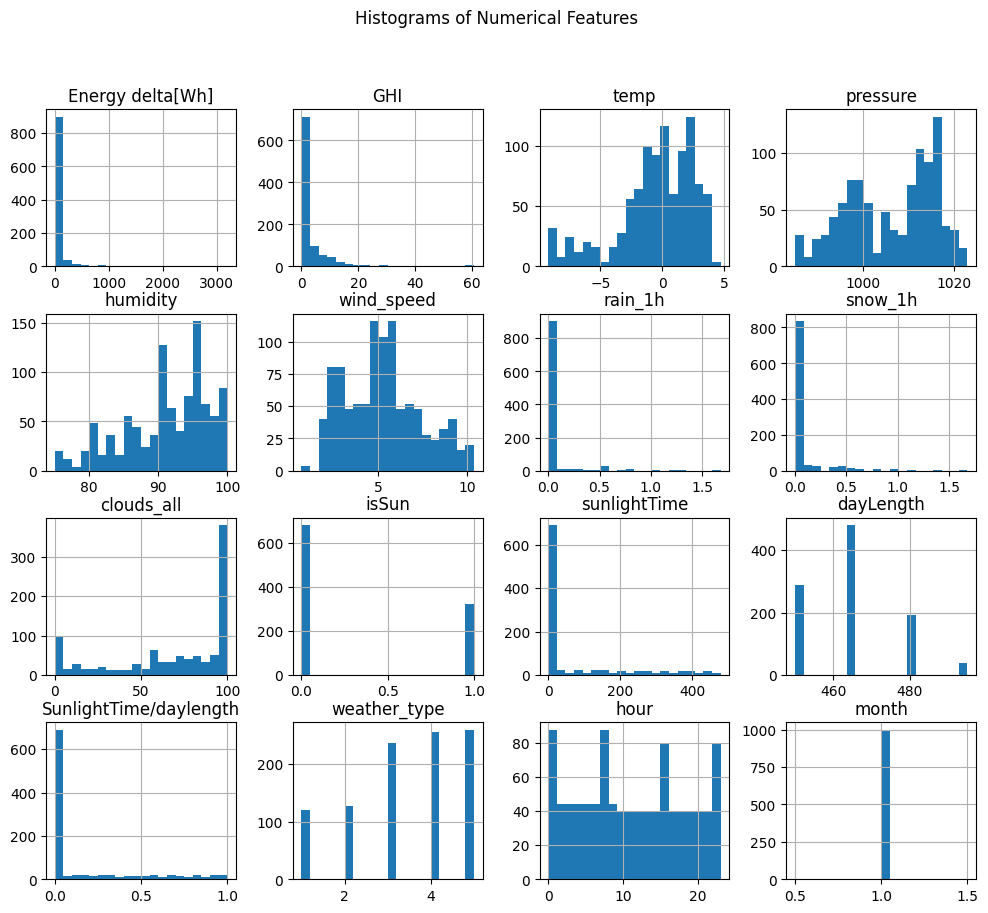

In [13]:
# Distribution of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

### Boxplots for Outlier Detection
The boxplots highlight extreme values in wind speed, temperature, and energy production.

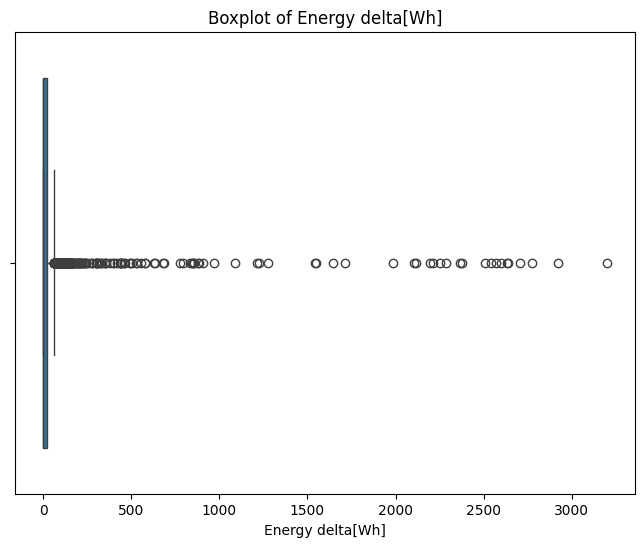

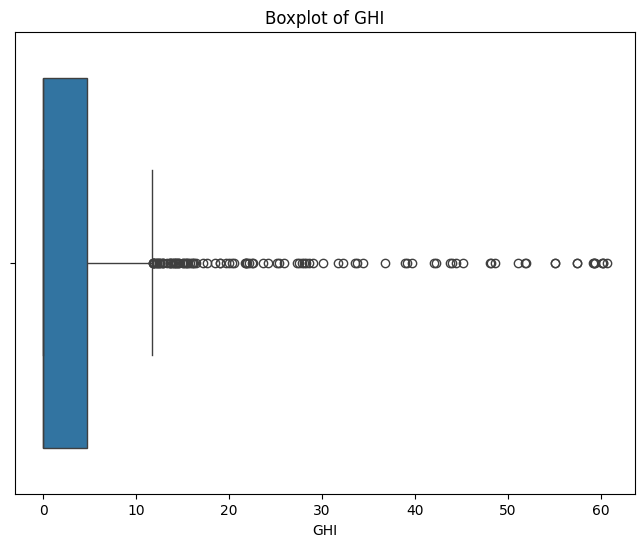

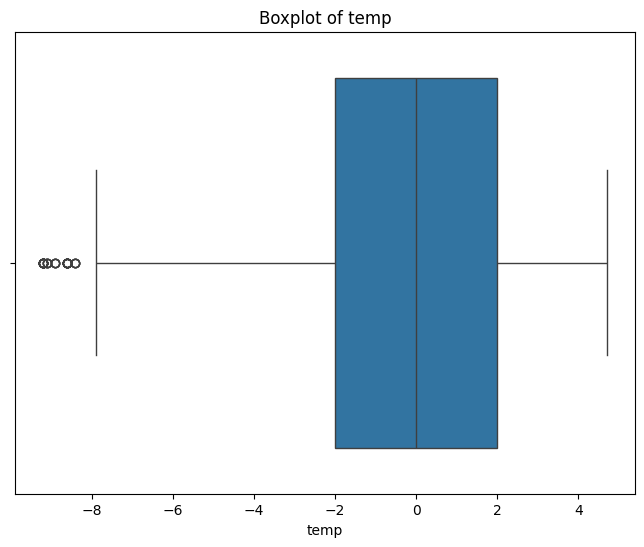

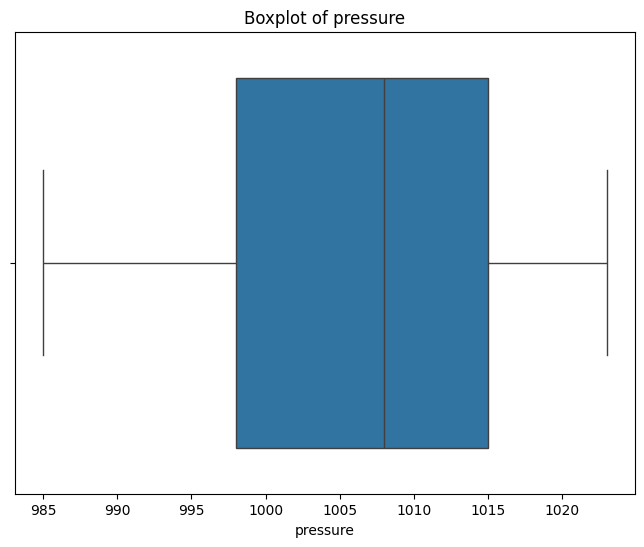

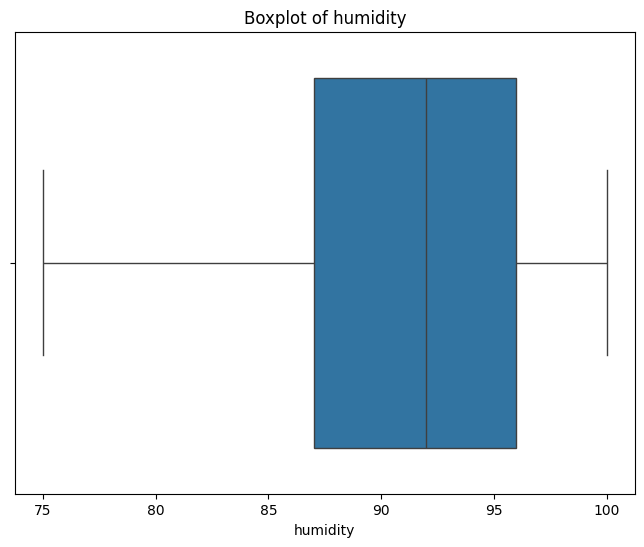

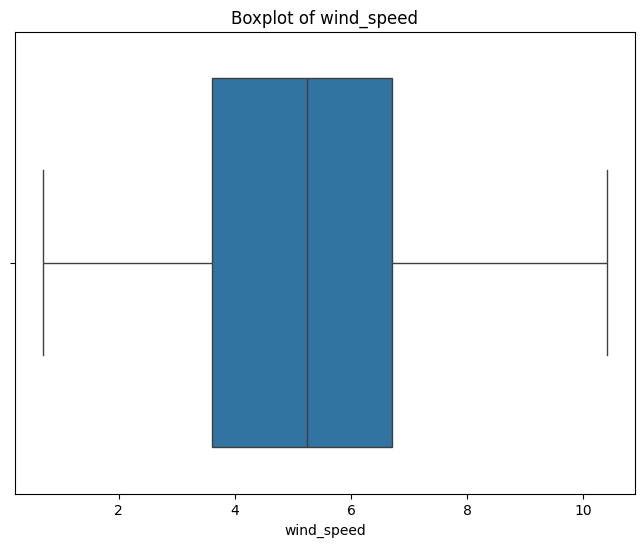

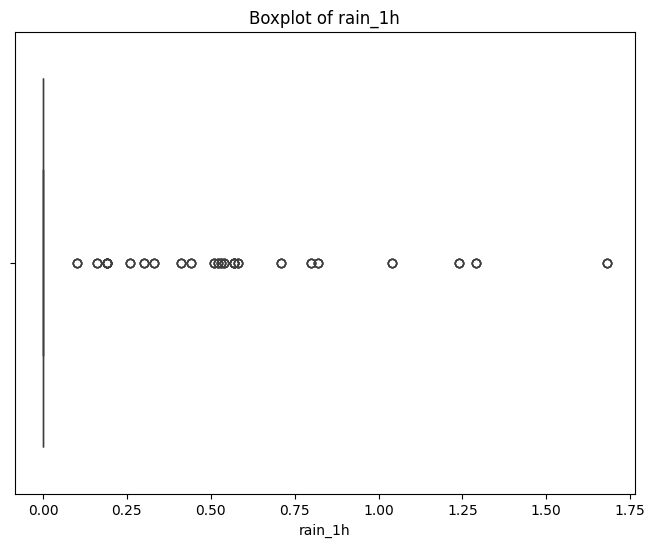

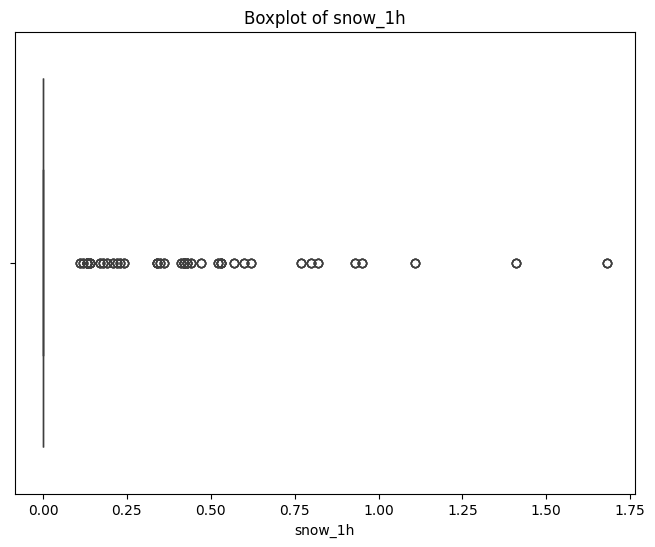

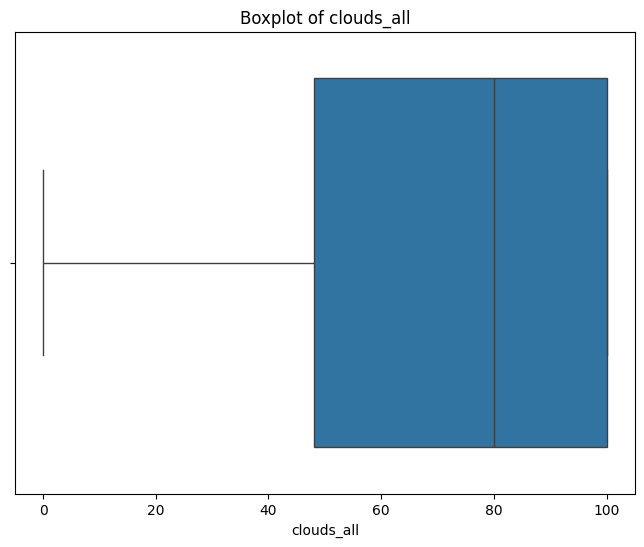

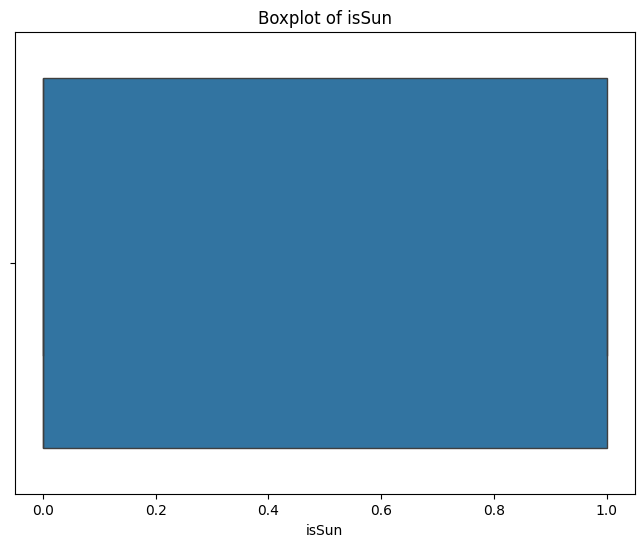

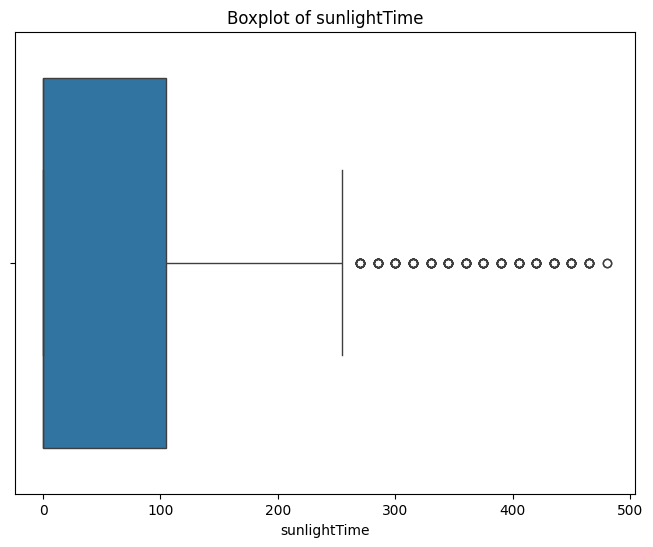

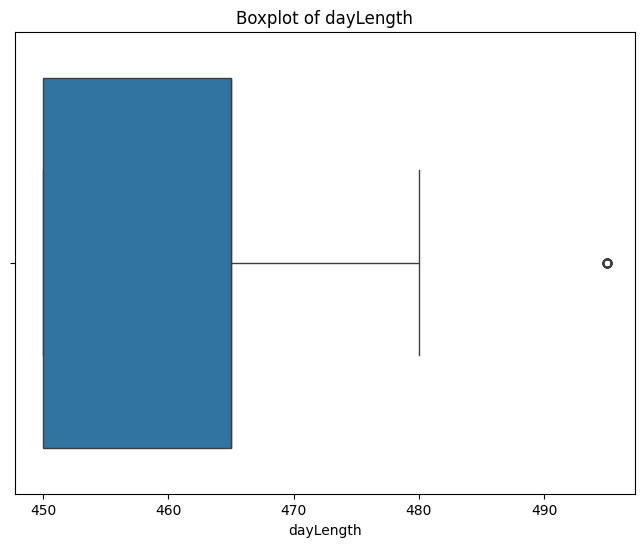

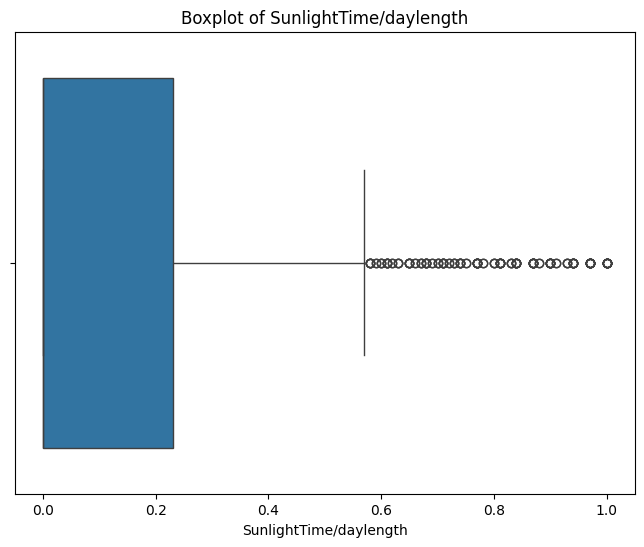

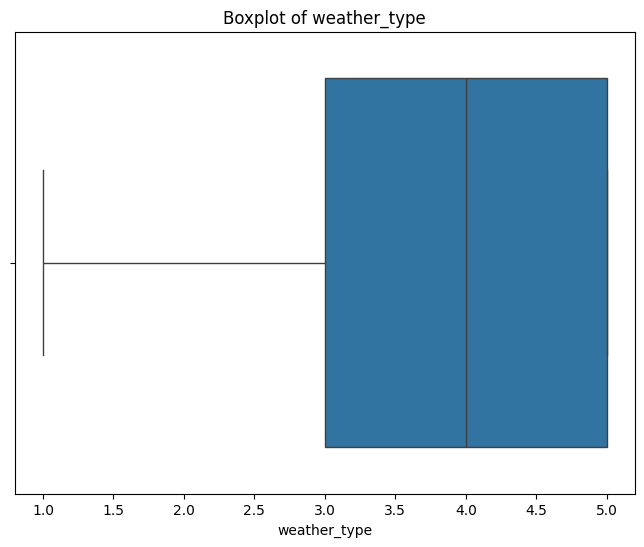

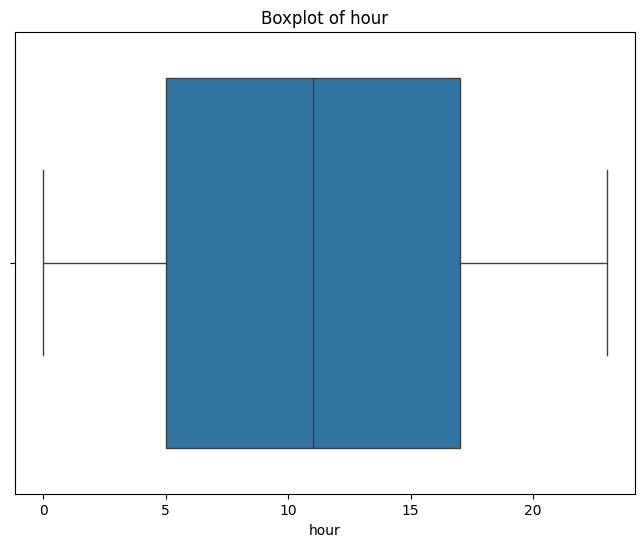

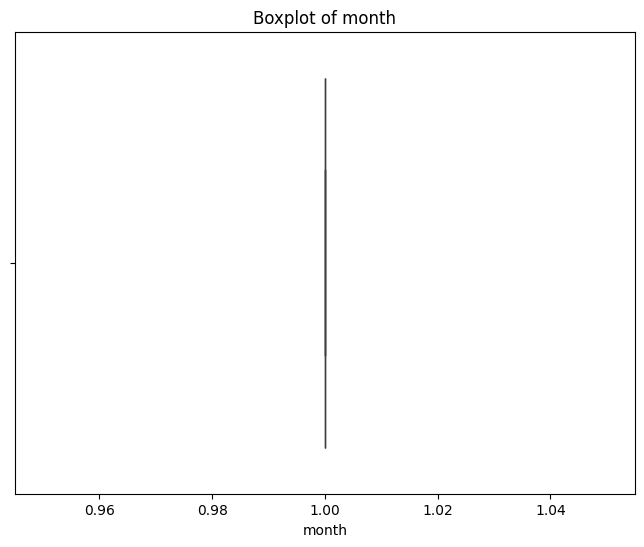

In [47]:
# Improved boxplots for outlier detection
for col in numerical_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[col], orient='h')  # Using orient='h' for horizontal orientation
    plt.title(f"Boxplot of {col}")  # Individual title for each feature
    plt.xlabel(col)  # Label the x-axis with the feature name
    plt.show()

### Correlation Analysis
The heatmap reveals a strong correlation between solar radiation (GHI) and energy production, as expected.

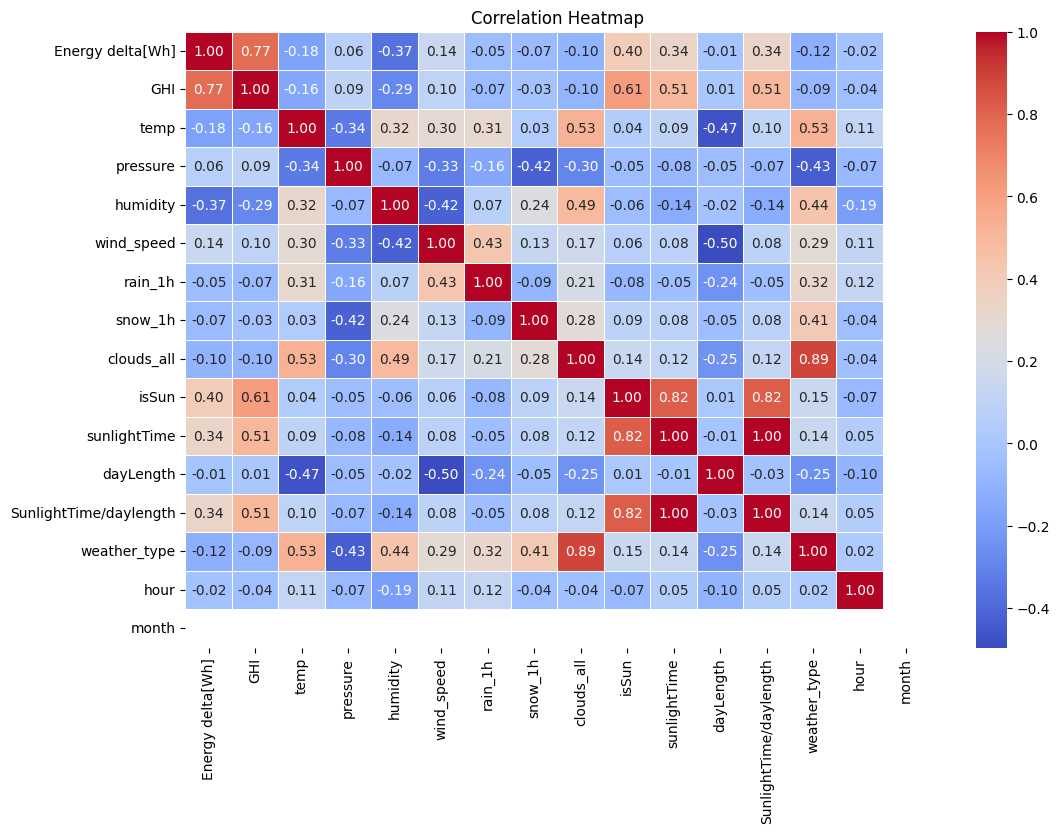

In [15]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Pairplot for Feature Relationships
Visualizing pairwise relationships between energy production, temperature, humidity, and wind speed to check for linear/non-linear dependencies.

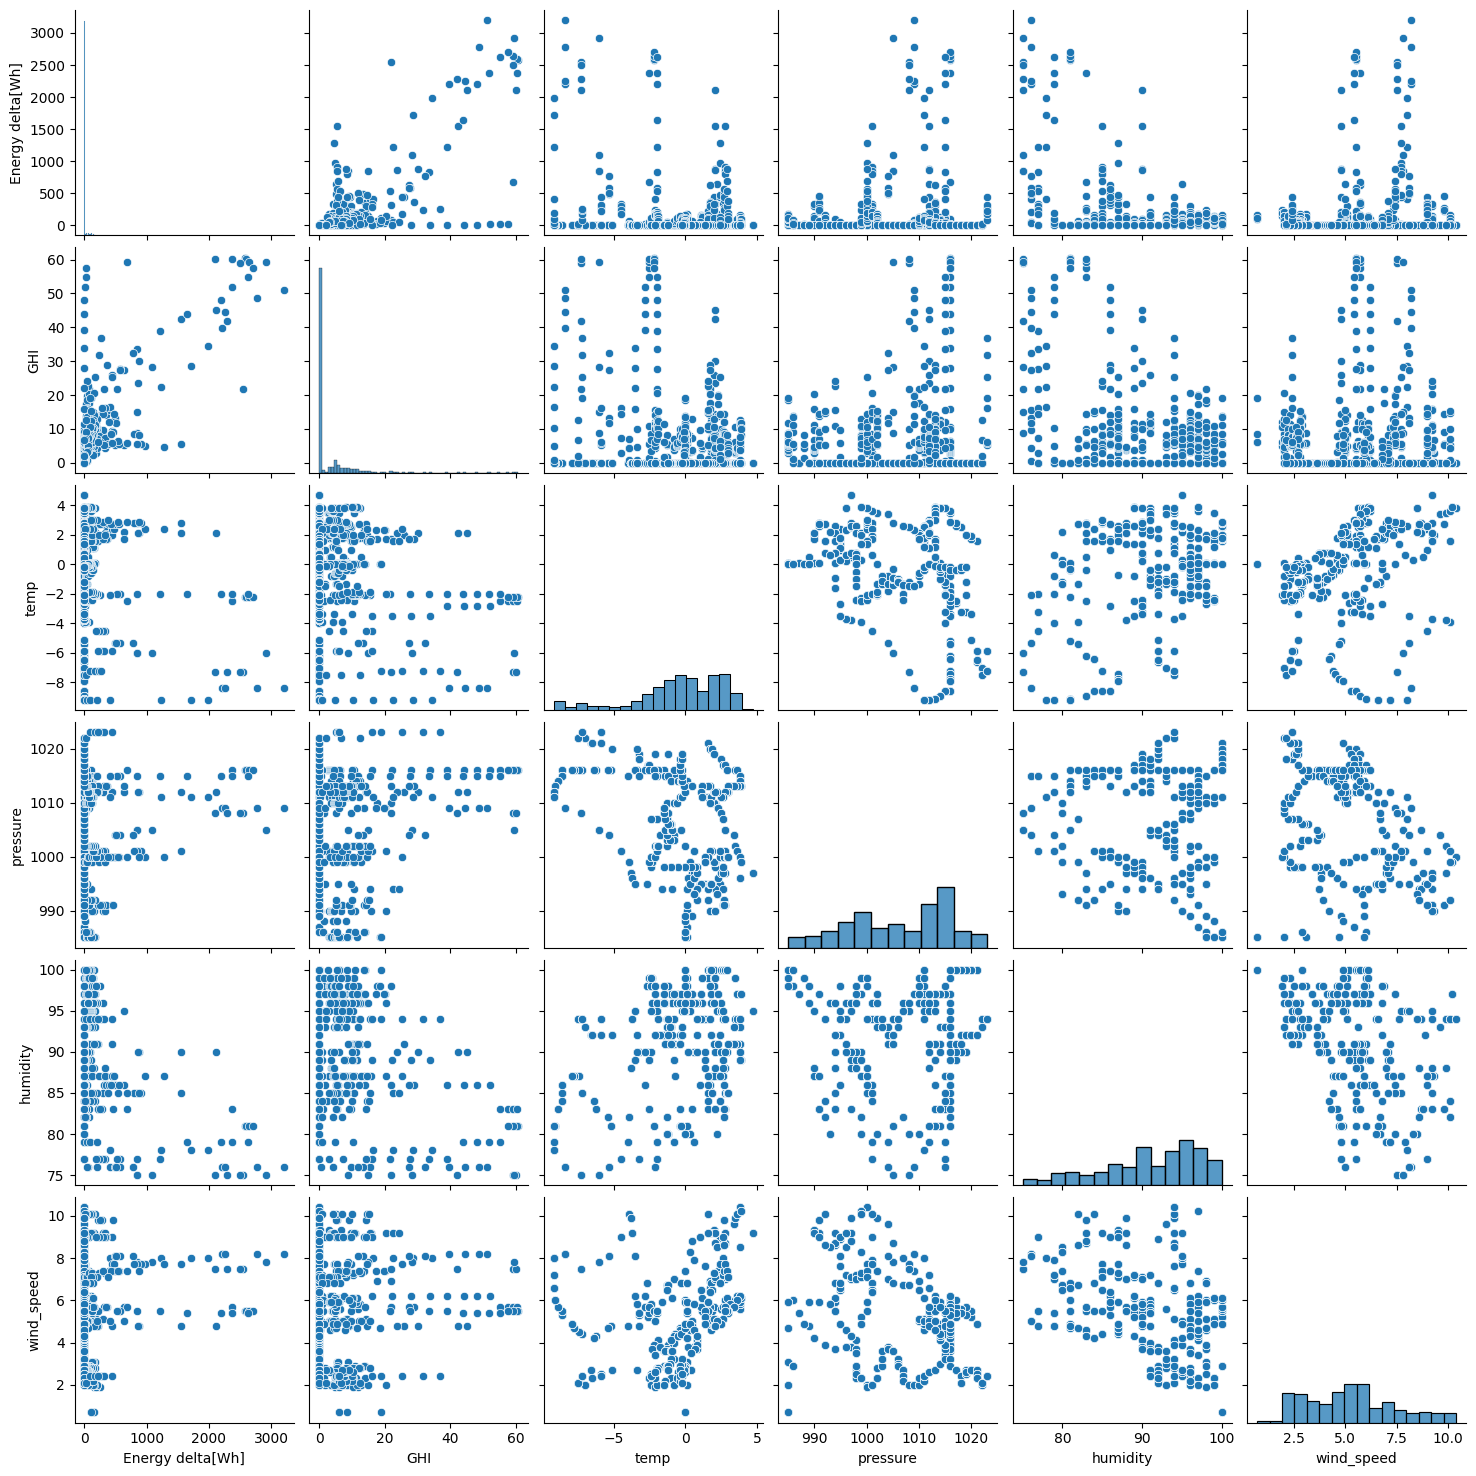

In [16]:
# Pairplot for selected columns to analyze relationships
selected_cols = ["Energy delta[Wh]", "GHI", "temp", "pressure", "humidity", "wind_speed"]
sns.pairplot(df[selected_cols])
plt.show()

### Weather Type Distribution
A count plot to check the distribution of different weather conditions in the dataset.

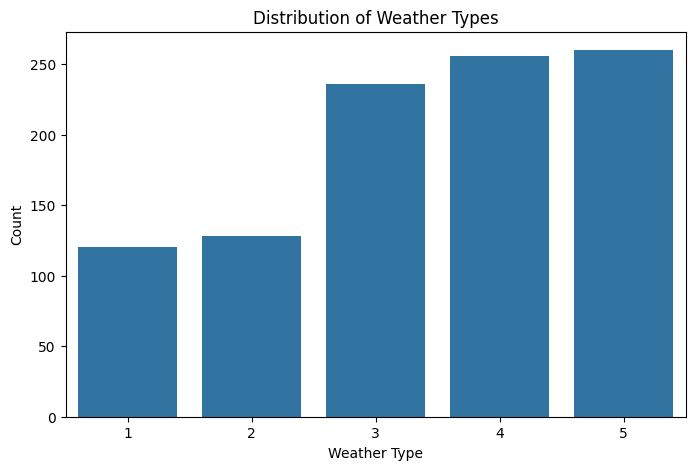

In [17]:
# Countplot of categorical column 'weather_type'
plt.figure(figsize=(8, 5))
sns.countplot(x=df['weather_type'])
plt.title("Distribution of Weather Types")
plt.xlabel("Weather Type")
plt.ylabel("Count")
plt.show()

### Time Series Analysis of Energy Production
A line plot to observe trends and seasonality in energy production over time.

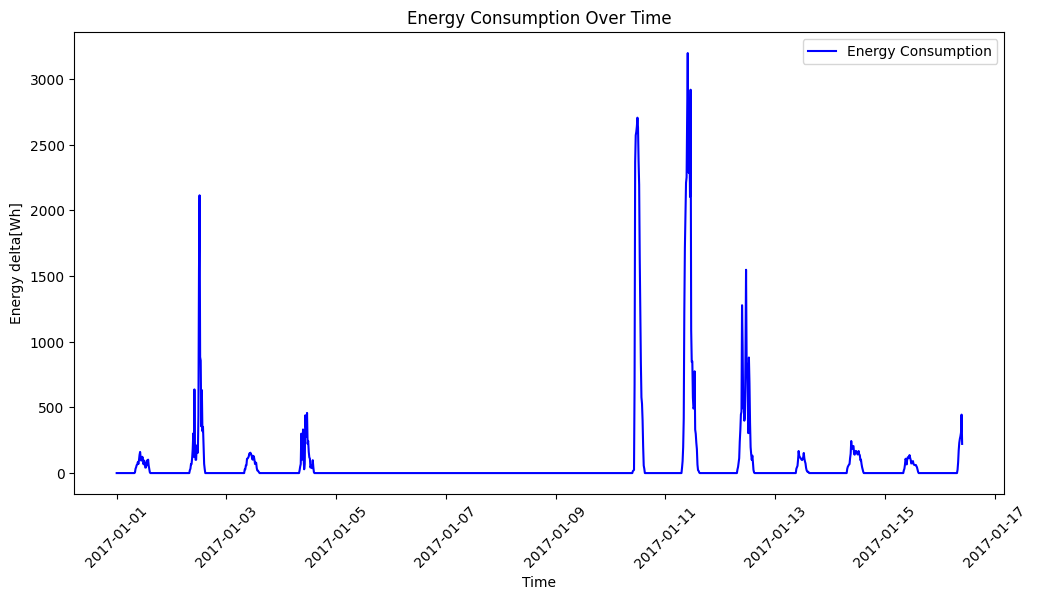

In [18]:
# Time series analysis (Energy delta[Wh] over time)
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Energy delta[Wh]'], label="Energy Consumption", color='b')
plt.xlabel("Time")
plt.ylabel("Energy delta[Wh]")
plt.title("Energy Consumption Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Collect and preprocess historical weather and energy production data, select appropriate machine learning techniques (e.g., regression models), train the model, and evaluate its performance.

Below code defines the list of feature columns (`features`) used for prediction and sets the target variable (`target`) as 'Energy delta[Wh]' for the model.

In [19]:
# Feature selection
features = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'isSun', 'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type', 'hour', 'month']

target = 'Energy delta[Wh]'

Below code splits the dataset `df` into training and testing sets, using 80% for training and 20% for testing, with a fixed random seed (42) for reproducibility.

In [20]:
# Train-test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Below code standardizes the feature data (`X_train` and `X_test`) by removing the mean and scaling to unit variance using `StandardScaler`. The scaler is fitted on the training data and then applied to both the training and testing sets.

In [21]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Below code initializes a dictionary `models` with three regression models: Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor, each with specified hyperparameters and a fixed random seed for reproducibility.

In [22]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

Below code trains each model in the `models` dictionary on the training data (`X_train`, `y_train`), makes predictions on the test set (`X_test`), calculates the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE), and stores the results in the `results` dictionary, printing the evaluation metrics for each model.

In [23]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = {'MAE': mae, 'RMSE': rmse}

    print(f"{name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}")

Linear Regression - MAE: 109.9306, RMSE: 234.0064
Random Forest - MAE: 32.7660, RMSE: 113.1763
Gradient Boosting - MAE: 41.9800, RMSE: 125.0176


This code creates a DataFrame `results_df` to compare the performance of the models by displaying the MAE and RMSE for each model, then plots a line graph comparing the actual values (`y_test`) with the predictions from the Gradient Boosting model (`models['Gradient Boosting'].predict(X_test)`) to visualize the model's performance.

                          MAE        RMSE
Linear Regression  109.930640  234.006385
Random Forest       32.766050  113.176285
Gradient Boosting   41.980004  125.017649


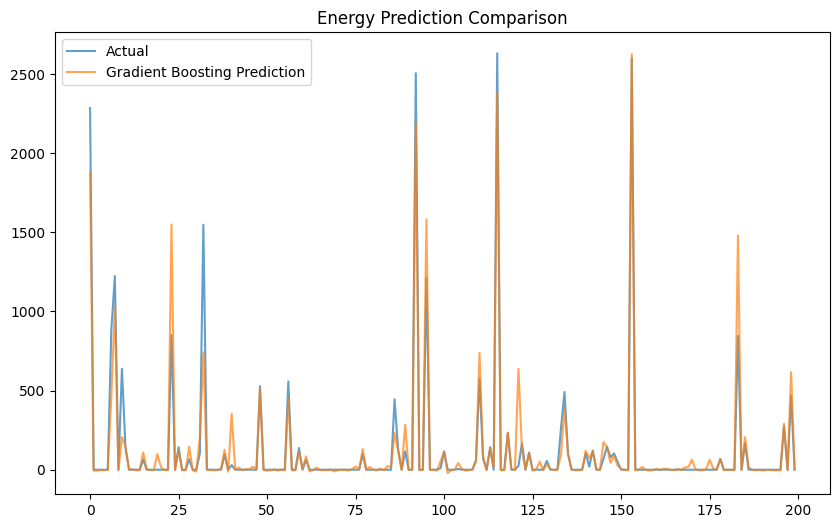

In [24]:
# Compare model performance
results_df = pd.DataFrame(results).T
print(results_df)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(models['Gradient Boosting'].predict(X_test), label='Gradient Boosting Prediction', alpha=0.7)
plt.legend()
plt.title('Energy Prediction Comparison')
plt.show()

### Perform exploratory data analysis (EDA), correlation analysis, and feature selection using methods like SHAP values, Principal Component Analysis (PCA), and decision trees.

Below code displays basic statistics (like mean, median, min, max, and standard deviation) for each column in the DataFrame `df` using `describe()`, and provides information about the data types, non-null counts, and memory usage of the DataFrame using `info()`.

In [25]:
# EDA: Basic statistics and missing values
print(df.describe())
print(df.info())

                      Time  Energy delta[Wh]         GHI         temp  \
count                 1000       1000.000000  1000.00000  1000.000000   
mean   2017-01-09 06:47:42        102.466000     4.09100    -0.477200   
min    2017-01-01 00:00:00          0.000000     0.00000    -9.200000   
25%    2017-01-03 14:26:15          0.000000     0.00000    -2.000000   
50%    2017-01-11 04:52:30          0.000000     0.00000    -0.000000   
75%    2017-01-13 19:18:45         24.250000     4.70000     2.000000   
max    2017-01-16 09:45:00       3198.000000    60.60000     4.700000   
std                    NaN        376.495787     9.77368     3.123305   

          pressure     humidity   wind_speed      rain_1h      snow_1h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1006.256000    91.088000     5.295200     0.055880     0.076560   
min     985.000000    75.000000     0.700000     0.000000     0.000000   
25%     998.000000    87.000000     3.600000  

In [26]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64


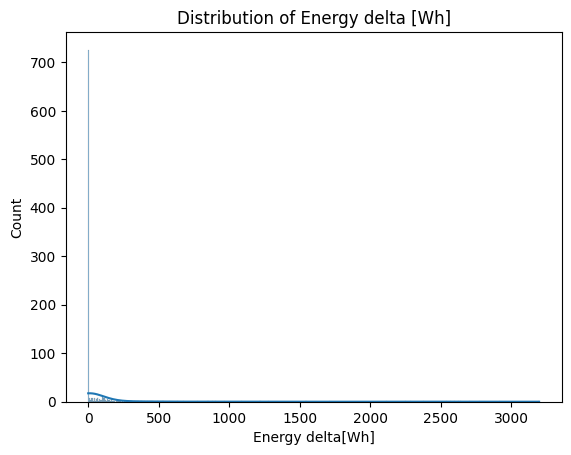

In [27]:
# Visualize the target distribution
sns.histplot(df['Energy delta[Wh]'], kde=True)
plt.title('Distribution of Energy delta [Wh]')
plt.show()

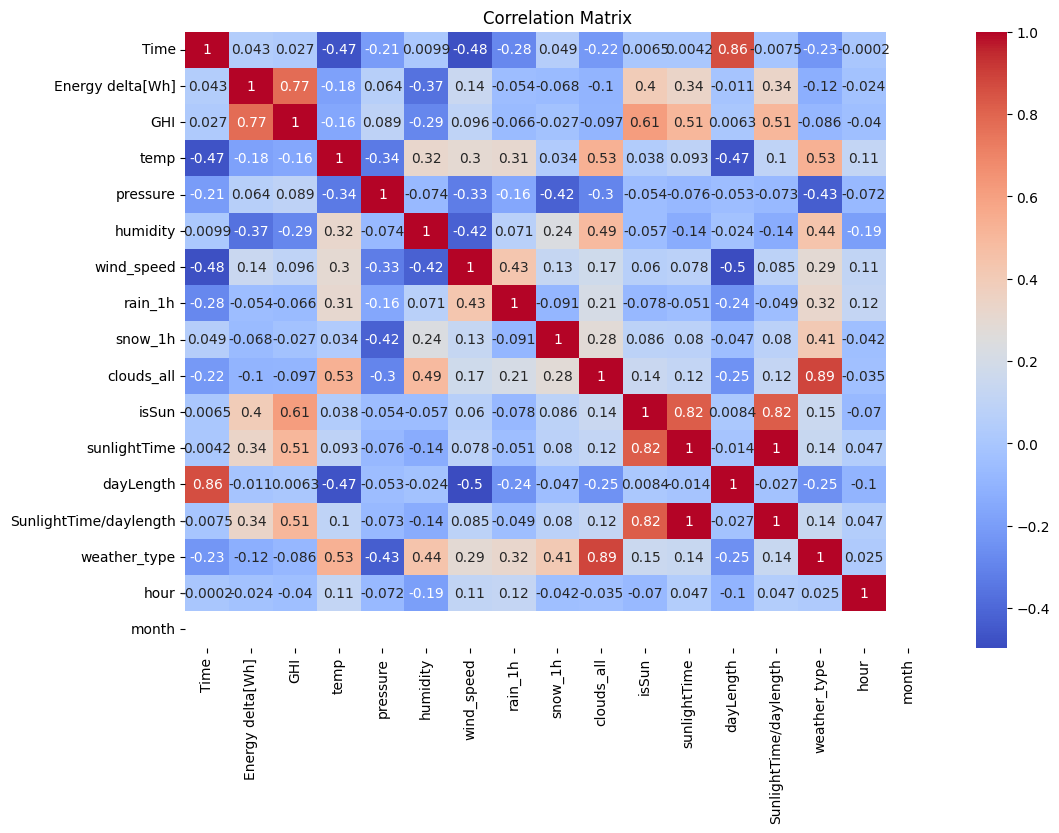

In [28]:
# Correlation analysis
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Feature-target correlation
print(corr_matrix['Energy delta[Wh]'].sort_values(ascending=False))

Energy delta[Wh]          1.000000
GHI                       0.774152
isSun                     0.396022
SunlightTime/daylength    0.337073
sunlightTime              0.336717
wind_speed                0.142866
pressure                  0.064054
Time                      0.042557
dayLength                -0.011099
hour                     -0.023658
rain_1h                  -0.053518
snow_1h                  -0.067678
clouds_all               -0.100184
weather_type             -0.122734
temp                     -0.181088
humidity                 -0.365594
month                          NaN
Name: Energy delta[Wh], dtype: float64


Below code defines the list of features to be used for feature selection via Principal Component Analysis (PCA), selecting columns like 'GHI', 'temp', 'pressure', etc., from the DataFrame for dimensionality reduction.

In [30]:
# Feature selection using PCA
features = [
    'GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h',
    'clouds_all', 'isSun', 'sunlightTime', 'dayLength', 'SunlightTime/daylength', 'weather_type', 'hour', 'month'
]

This code assigns the selected feature columns (`features`) from the DataFrame `df` to `X` (input data), and the target variable 'Energy delta[Wh]' to `y` (output data) for model training and prediction.

In [31]:
X = df[features]
y = df['Energy delta[Wh]']

Below code standardizes the feature data (`X`) using `StandardScaler`, then applies Principal Component Analysis (PCA) with 5 components to reduce the dimensionality. It prints the explained variance ratio for each principal component, and plots the cumulative explained variance to visualize how much information is retained by the selected components.

Explained variance ratio: [0.25219454 0.22372123 0.13427403 0.09007199 0.07052826]


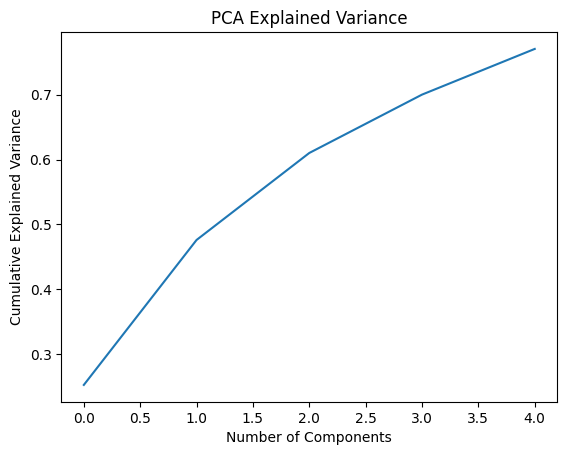

In [32]:
# Standardize data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

Below code trains a Random Forest Regressor (`rf`) on the feature data `X` and target `y`, then extracts and sorts the feature importances. It creates a DataFrame (`feature_importance_df`) to display the features and their respective importance scores. The results are plotted as a horizontal bar chart to visualize the feature importance using Seaborn.

                   Feature  Importance
0                      GHI    0.665707
3                 humidity    0.172924
11  SunlightTime/daylength    0.040978
9             sunlightTime    0.039051
1                     temp    0.024232
4               wind_speed    0.018722
2                 pressure    0.013154
13                    hour    0.008230
7               clouds_all    0.007511
12            weather_type    0.006627
10               dayLength    0.001617
6                  snow_1h    0.000933
5                  rain_1h    0.000311
8                    isSun    0.000001
14                   month    0.000000


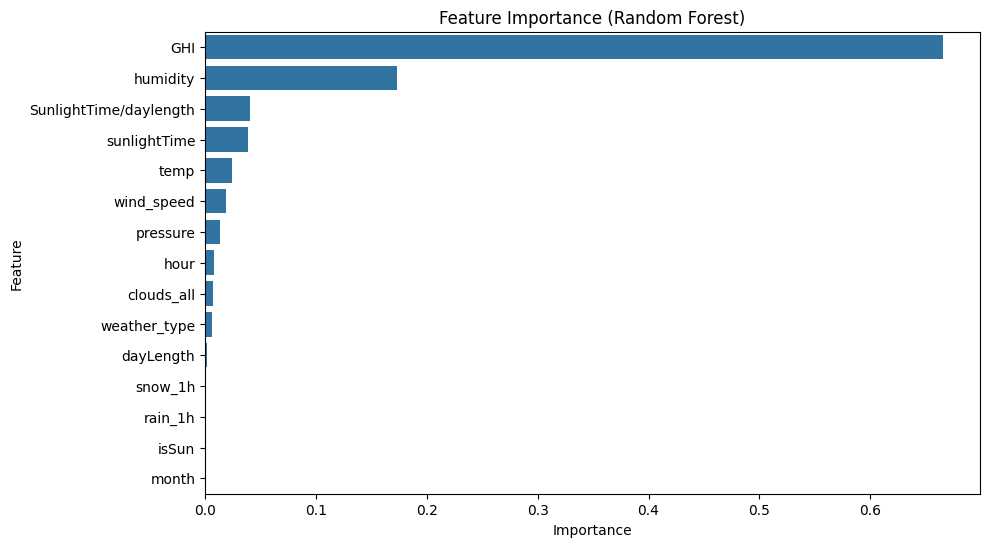

In [33]:
# Feature importance using Decision Trees
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()

Below code uses SHAP (SHapley Additive exPlanations) to explain the output of the trained Random Forest model (`rf`) by computing the SHAP values for each feature in the dataset `X`. It generates two plots:
1. A summary bar plot (`shap.summary_plot(shap_values, X, plot_type='bar')`) that shows the average magnitude of SHAP values for each feature.
2. A detailed summary plot (`shap.summary_plot(shap_values, X)`) that visualizes the distribution of SHAP values for each feature, providing insights into how each feature influences the model’s predictions.

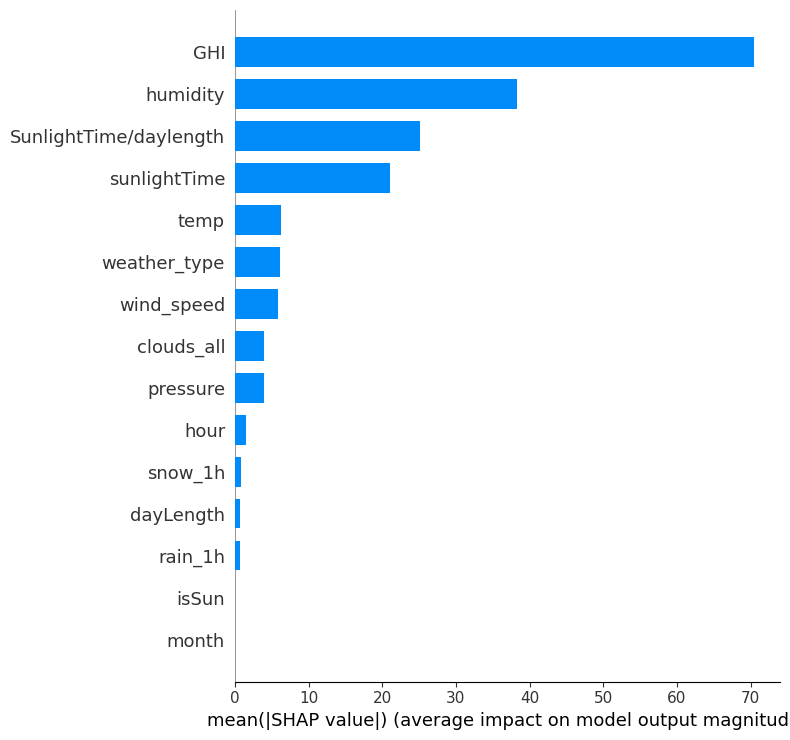

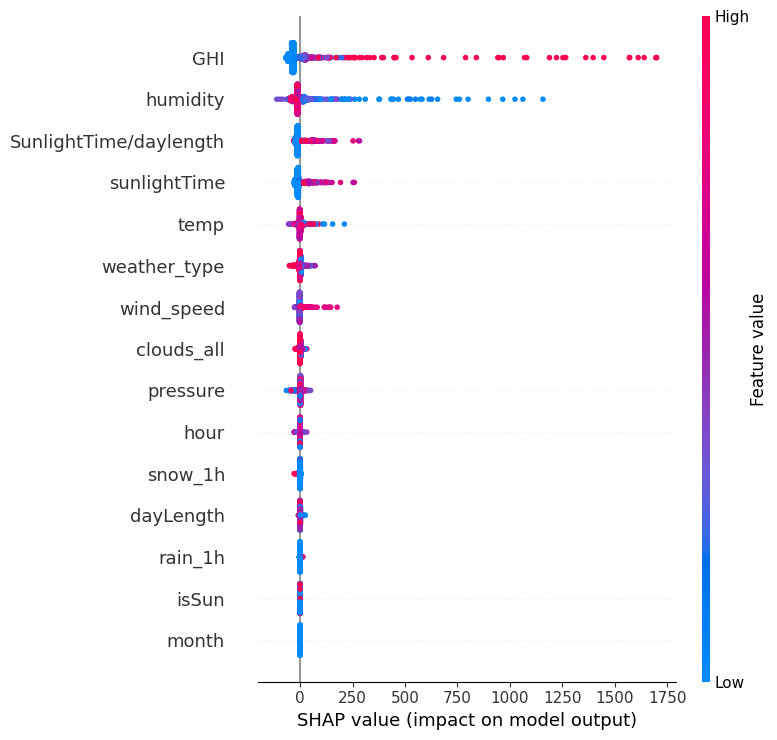

In [34]:
# SHAP values for interpretability
explainer = shap.Explainer(rf, X)
shap_values = explainer(X, check_additivity=False)

shap.summary_plot(shap_values, X, plot_type='bar')
shap.summary_plot(shap_values, X)


### Utilize time-series models like ARIMA, LSTM, or Transformer-based models to develop short-term energy production forecasts and compare their performance.

In [35]:
# Feature selection
features = ['GHI', 'temp', 'humidity', 'wind_speed', 'hour', 'month']

target = 'Energy delta[Wh]'

Below code scales the selected feature columns (`features`) in the DataFrame `df` using the `MinMaxScaler`, which transforms the values to a range between 0 and 1. The scaler is fitted on the feature data and applied to the entire feature set in the DataFrame.

In [36]:
# Data scaling
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

This code defines a function `create_sequences` to prepare the data for LSTM by converting the time-series data into sequences of a specified length (`seq_length`), where each sequence contains `seq_length` previous observations to predict the next value. It then splits the data into training and testing sets (80% for training and 20% for testing) based on the sequence data generated.

In [37]:
# Prepare data for LSTM
def create_sequences(df, target, seq_length=24):
    X, y = [], []
    for i in range(len(df) - seq_length):
        X.append(df.iloc[i:i + seq_length].values)
        y.append(df[target].iloc[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 24
X, y = create_sequences(df[features + [target]], target, seq_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [38]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 299489.2188 - val_loss: 1426.2274
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 205634.5781 - val_loss: 1388.4127
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 260854.2500 - val_loss: 1359.4519
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 226462.1406 - val_loss: 1337.4242
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 220771.3750 - val_loss: 1319.9889
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 231125.6719 - val_loss: 1304.1777
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 233674.5781 - val_loss: 1289.1815
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 286194.7188 - val_loss: 1271.2162
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 205517.1719 - val_loss: 1249.5913
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 222993.3125 - val_loss: 1234.1985


This code uses the trained LSTM model to make predictions (`y_pred_lstm`) on the test data (`X_test`). The model's output is the predicted values for the target variable.

In [39]:
# LSTM Predictions
y_pred_lstm = lstm_model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


Below code evaluates the performance of the LSTM model by calculating two metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) between the true values (`y_test`) and the predicted values (`y_pred_lstm`). The results are then printed with 4 decimal places.

In [40]:
# Evaluate LSTM
lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
print(f"LSTM MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}")

LSTM MAE: 36.3531, RMSE: 76.6990


This code prepares the target variable (`arima_data`) for the ARIMA model. It then fits an ARIMA model with specified parameters (`p=5`, `d=1`, `q=0`) on the training data (`arima_data[:train_size]`). After fitting the model, it generates forecasts (`arima_forecast`) for the test period (equal to the length of `y_test`).

In [41]:
# Prepare data for ARIMA
arima_data = df[target]

# Fit ARIMA model (p=5, d=1, q=0 as an example)
arima_model = ARIMA(arima_data[:train_size], order=(5, 1, 0))
arima_model_fit = arima_model.fit()

# Forecast using ARIMA
arima_forecast = arima_model_fit.forecast(steps=len(y_test))

This code evaluates the performance of the ARIMA model by calculating the Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) between the actual values (`y_test`) and the predicted values (`arima_forecast`). The results are printed with 4 decimal places for easy comparison.

In [42]:
# Evaluate ARIMA
arima_mae = mean_absolute_error(y_test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(y_test, arima_forecast))
print(f"ARIMA MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}")

ARIMA MAE: 36.8112, RMSE: 80.7503


This code creates a plot to visually compare the actual values (`y_test`), LSTM model predictions (`y_pred_lstm`), and ARIMA model predictions (`arima_forecast`). The plot includes a legend to distinguish between the actual data and the predictions from both models. The title of the plot is "Renewable Energy Production Prediction," and the plot is displayed using Matplotlib.

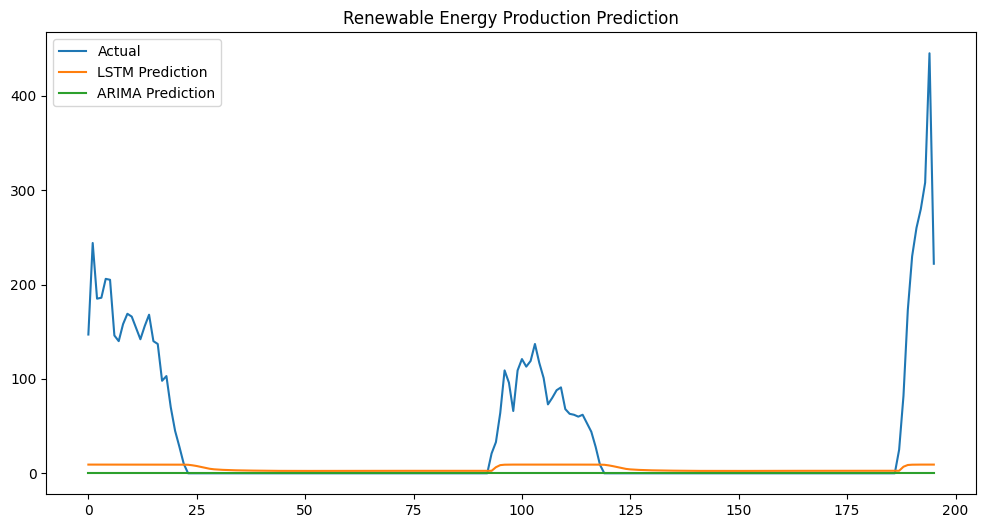

In [43]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.plot(arima_forecast.values, label='ARIMA Prediction')
plt.legend()
plt.title('Renewable Energy Production Prediction')
plt.show()

### Interactive Dashboard Creation

This code creates an interactive Dash web application for forecasting energy production and visualizing climate conditions. Here's an overview of what each part of the app does:

1. **Data Preprocessing**:
   - The `StandardScaler` is applied to the feature data (`X`) to scale the input values before training the `GradientBoostingRegressor` model.
   
2. **Model Training**:
   - The model (`GradientBoostingRegressor`) is trained using selected features (`GHI`, `temp`, `pressure`, etc.) to predict the target variable `Energy delta[Wh]`.

3. **Dash App Layout**:
   - The layout includes:
     - Sliders for user input for features like GHI, temperature, humidity, wind speed, hour, and month.
     - A section displaying the predicted energy production (`Energy delta[Wh]`) based on the user's input.
     - A climate condition scatter plot showing how energy production varies with different climate conditions, with colors representing temperature and sizes representing wind speed.

4. **Callbacks**:
   - A callback function updates both the energy prediction and the climate condition visualization when the user interacts with the sliders.
   - The input values from the sliders are scaled and fed into the trained model to generate a prediction, which is then displayed.
   - A scatter plot is also created using Plotly, visualizing how energy production is influenced by different climate conditions.

5. **Running the App**:
   - The app is set to run in debug mode and will launch a local web server. When the server is running, you can interact with the sliders to see how changing the inputs affects the energy prediction and the climate visualization.


In [44]:
# Feature selection
features = ['GHI', 'temp', 'pressure', 'humidity', 'wind_speed', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'month']
target = 'Energy delta[Wh]'

# Preprocessing
X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Gradient Boosting Model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_scaled, y)

# Initialize Dash app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Energy Production Forecast Dashboard"),

    html.Div([
        html.Label("GHI"),
        dcc.Slider(id='ghi', min=df['GHI'].min(), max=df['GHI'].max(), step=0.1, value=df['GHI'].mean(), marks={i: str(i) for i in range(int(df['GHI'].min()), int(df['GHI'].max()), 50)}),

        html.Label("Temperature"),
        dcc.Slider(id='temp', min=df['temp'].min(), max=df['temp'].max(), step=0.1, value=df['temp'].mean(), marks={i: str(i) for i in range(int(df['temp'].min()), int(df['temp'].max()), 5)}),

        html.Label("Humidity"),
        dcc.Slider(id='humidity', min=df['humidity'].min(), max=df['humidity'].max(), step=0.1, value=df['humidity'].mean(), marks={i: str(i) for i in range(int(df['humidity'].min()), int(df['humidity'].max()), 10)}),

        html.Label("Wind Speed"),
        dcc.Slider(id='wind_speed', min=df['wind_speed'].min(), max=df['wind_speed'].max(), step=0.1, value=df['wind_speed'].mean(), marks={i: str(i) for i in range(int(df['wind_speed'].min()), int(df['wind_speed'].max()), 2)}),

        html.Label("Hour of Day"),
        dcc.Slider(id='hour', min=0, max=23, step=1, value=12, marks={i: str(i) for i in range(0, 24)}),

        html.Label("Month"),
        dcc.Slider(id='month', min=1, max=12, step=1, value=6, marks={i: str(i) for i in range(1, 13)})
    ]),

    html.H2("Forecasted Energy Production (Wh):"),
    html.Div(id='prediction-output'),

    html.H2("Climate Conditions Visualization"),
    dcc.Graph(id='climate-graph')
])

# Callbacks to update prediction and visualization
@app.callback(
    [Output('prediction-output', 'children'), Output('climate-graph', 'figure')],
    [Input('ghi', 'value'), Input('temp', 'value'), Input('humidity', 'value'),
     Input('wind_speed', 'value'), Input('hour', 'value'), Input('month', 'value')]
)
def update_dashboard(ghi, temp, humidity, wind_speed, hour, month):
    input_data = np.array([[ghi, temp, df['pressure'].mean(), humidity, wind_speed, df['rain_1h'].mean(), df['snow_1h'].mean(), df['clouds_all'].mean(), hour, month]])

    # Ensure the input has the same feature order as during training
    input_df = pd.DataFrame(input_data, columns=features)
    input_scaled = scaler.transform(input_df)

    prediction = model.predict(input_scaled)[0]

    # Climate conditions visualization
    fig = px.scatter(df, x='GHI', y='Energy delta[Wh]', color='temp', size='wind_speed',
                     title='Energy Production vs Climate Conditions')

    return f"{prediction:.2f} Wh", fig

# Run app
if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>